<a href="https://colab.research.google.com/github/sahillakhmani/Natural-Language-Processing/blob/main/SkipgramTrainingNegativeSampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 1 to Problem 4(a,b,c)

https://drive.google.com/file/d/1PDxpkgK1fgmEO5Az3y7axHuU229oaa4g/view?usp=sharing

# Problem 4

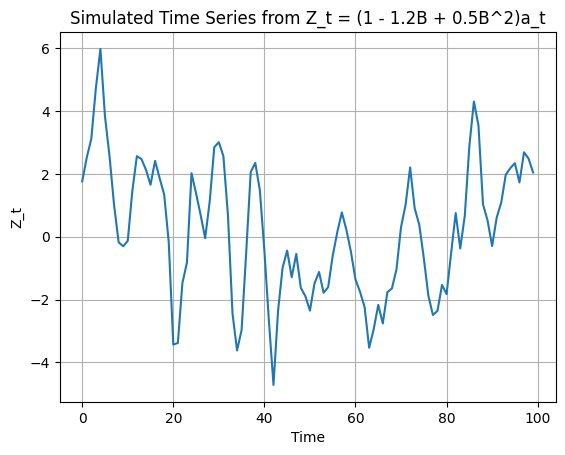

In [ ]:
import numpy as np
from scipy.signal import lfilter
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(0)

# Number of observations
n = 100

# White noise with sigma^2 = 1
sigma = 1
a_t = np.random.normal(0, sigma, n)

# Define the ARMA coefficients for Z_t = (1 - 1.2B + 0.5B^2)a_t
# This is equivalent to Z_t = 1*a_t - 1.2*a_{t-1} + 0.5*a_{t-2}
ar_coeff = [1, -1.2, 0.5]  # AR(2) coefficients
ma_coeff = [1]             # MA(0), since it's only AR model

# Simulate the series
Z_t = lfilter(ma_coeff, ar_coeff, a_t)

# Plot the series
plt.plot(Z_t)
plt.title('Simulated Time Series from Z_t = (1 - 1.2B + 0.5B^2)a_t')
plt.xlabel('Time')
plt.ylabel('Z_t')
plt.grid(True)
plt.show()



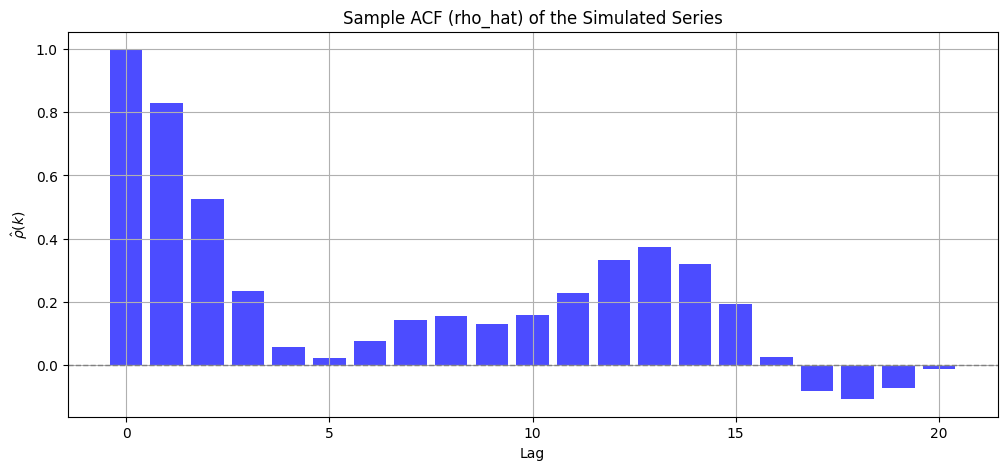

<Figure size 1200x500 with 0 Axes>

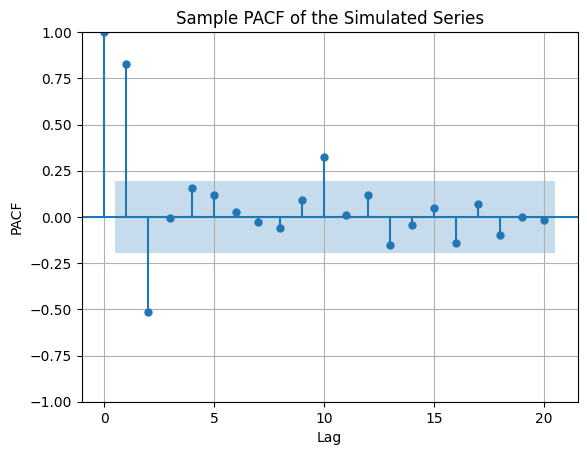

In [ ]:
import numpy as np
from scipy.signal import lfilter
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Set random seed for reproducibility
np.random.seed(0)


# Calculate sample mean
Z_mean = np.mean(Z_t)

# Calculate sample autocorrelation coefficients rho_hat
rho_hat = np.zeros(21)  # for k = 0 to 20
denominator = np.sum((Z_t - Z_mean) ** 2)  # denominator for rho_hat

for k in range(21):
    if k == 0:
        rho_hat[k] = 1.0  # Autocorrelation at lag 0 is always 1
    else:
        numerator = np.sum((Z_t[k:] - Z_mean) * (Z_t[:-k] - Z_mean))  # correlation term
        rho_hat[k] = numerator / denominator


# Plot sample ACF (rho_hat)
plt.figure(figsize=(12, 5))
plt.bar(range(21), rho_hat, color='blue', alpha=0.7)
plt.axhline(0, color='gray', lw=1, linestyle='--')
plt.title('Sample ACF (rho_hat) of the Simulated Series')
plt.xlabel('Lag')
plt.ylabel(r'$\hat{\rho}(k)$')
plt.grid()
plt.show()

# Plot sample PACF
plt.figure(figsize=(12, 5))
plot_pacf(Z_t, lags=20, alpha=0.05)
plt.title('Sample PACF of the Simulated Series')
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.grid()
plt.show()



#Problem 5

<ipython-input-8-e150bc4fd0f3>:21: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(range(len(acf_values)), acf_values, use_line_collection=True)
<ipython-input-8-e150bc4fd0f3>:28: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(range(len(pacf_values)), pacf_values, use_line_collection=True)


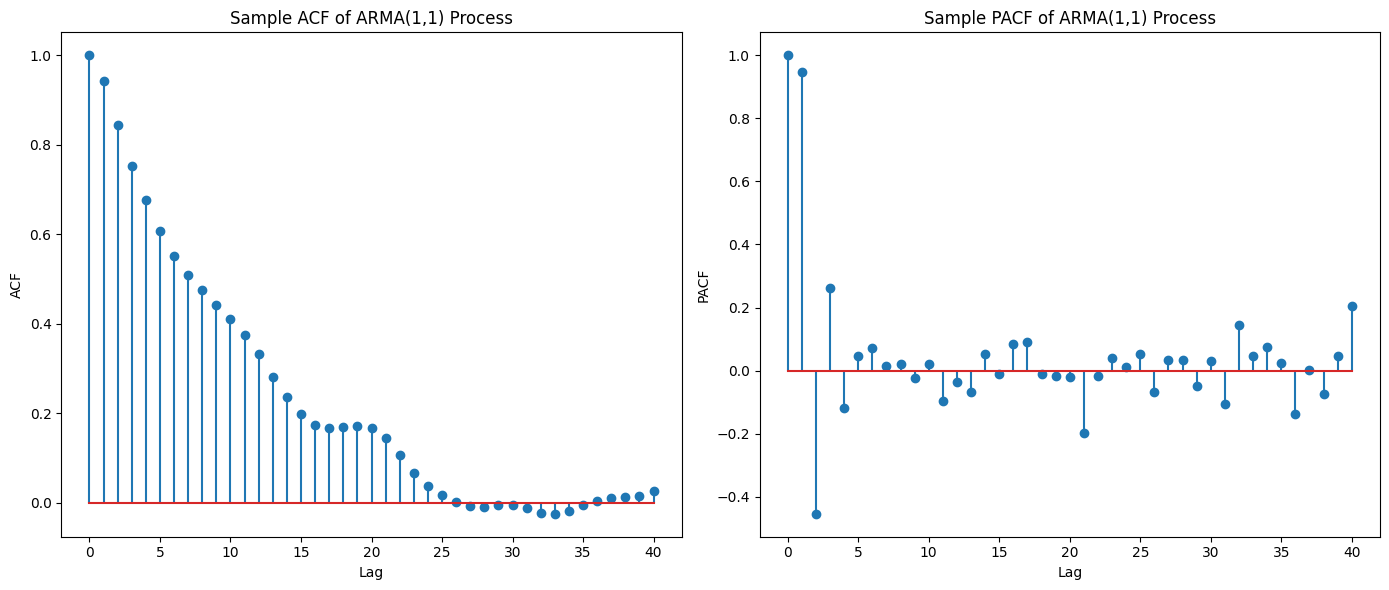

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

np.random.seed(50)

ar_params = np.array([0.9])   # AR(1) parameter
ma_params = np.array([0.5])   # MA(1) parameter

arma_process = sm.tsa.ArmaProcess.from_coeffs(ar_params, ma_params)
n_obs = 250
simulated_data = arma_process.generate_sample(nsample=n_obs)

acf_values = sm.tsa.acf(simulated_data, nlags=40)
pacf_values = sm.tsa.pacf(simulated_data, nlags=40)

# Plot ACF
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.stem(range(len(acf_values)), acf_values, use_line_collection=True)
plt.title('Sample ACF of ARMA(1,1) Process')
plt.xlabel('Lag')
plt.ylabel('ACF')

# Plot PACF
plt.subplot(1, 2, 2)
plt.stem(range(len(pacf_values)), pacf_values, use_line_collection=True)
plt.title('Sample PACF of ARMA(1,1) Process')
plt.xlabel('Lag')
plt.ylabel('PACF')

plt.tight_layout()
plt.show()


**ACF**: The ACF plot shows a gradual decline, which is characteristic of AR components but doesn't cut off immediately as in a purely MA model.

**PACF**: The PACF shows a significant spike at lag 1 and then tapers off, suggesting an AR component, but it doesn’t cut off strictly after lag 1.

Based on these patterns, the model is a mixed ARMA model (ARMA(1,1)) rather than purely AR or purely MA

# Problem 6

## 6(a)

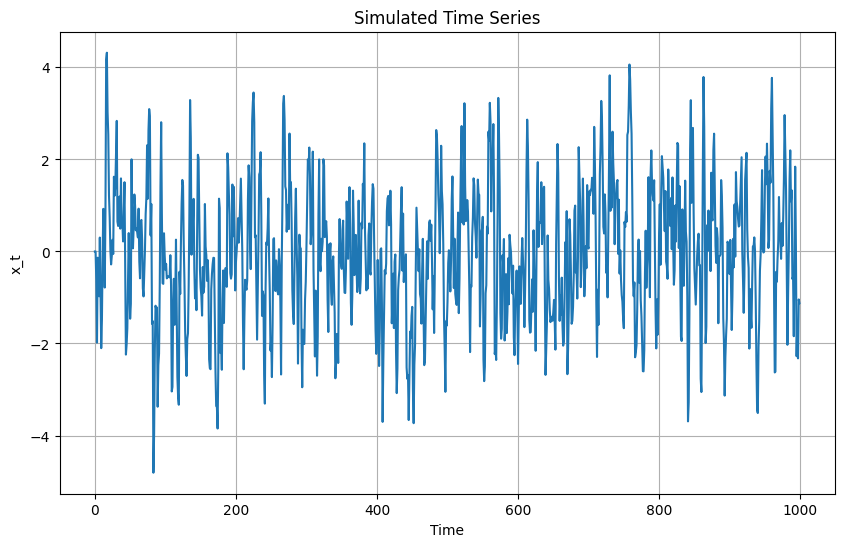

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(50)

n = 1000

w_t = np.random.normal(0, 1, n)

x_t = np.zeros(n)

phi_1 = 5 / 6
phi_2 = -1 / 6

for t in range(2, n):
    x_t[t] = phi_1 * x_t[t-1] + phi_2 * x_t[t-2] + w_t[t]

plt.figure(figsize=(10, 6))
plt.plot(x_t)
plt.title('Simulated Time Series')
plt.xlabel('Time')
plt.ylabel('x_t')
plt.grid(True)
plt.show()


## 6(b)

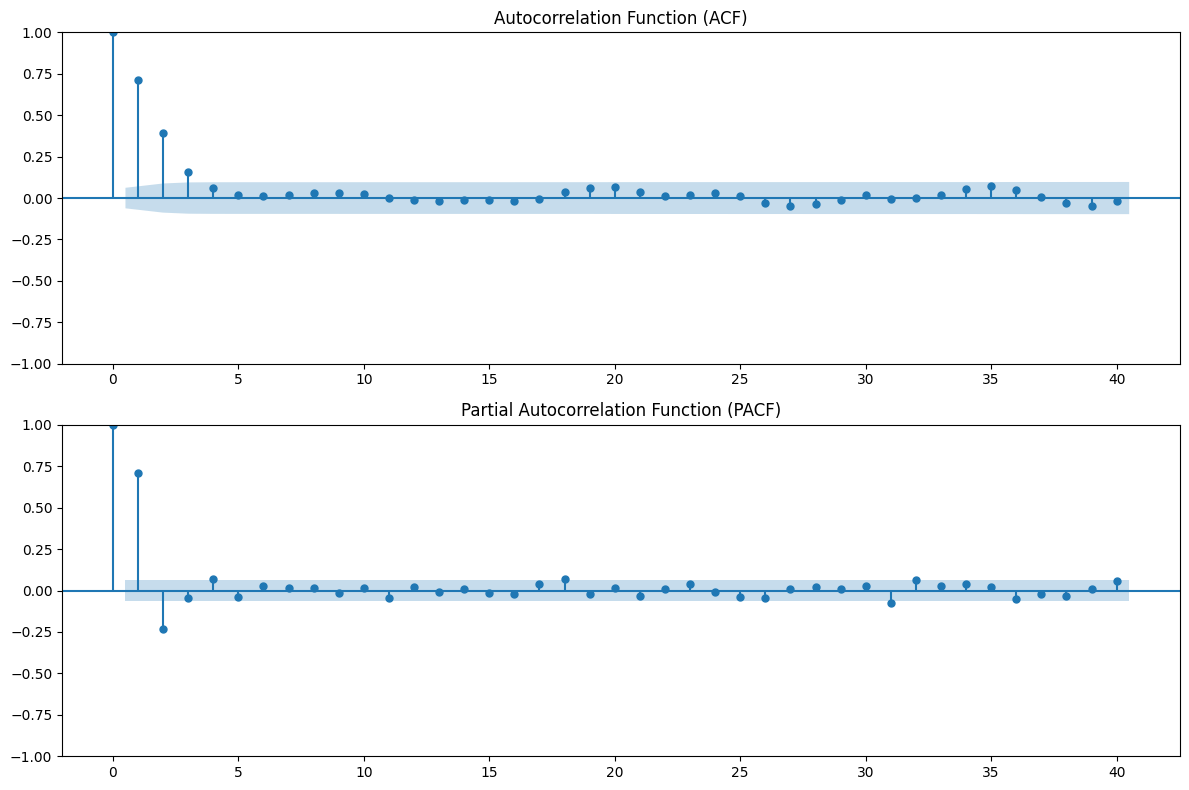

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(2, 1, figsize=(12, 8))

plot_acf(x_t, lags=40, ax=ax[0])
ax[0].set_title('Autocorrelation Function (ACF)')

plot_pacf(x_t, lags=40, ax=ax[1], method='ywm')
ax[1].set_title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()


The correlogram (ACF) and partial correlogram (PACF) provide insights into the dependence structure of the time series:

**ACF Plot**: The autocorrelation function gradually decreases, showing significant positive correlations for early lags. This behavior is expected for an AR(2) process, as correlations persist due to the autoregressive terms.

**PACF Plot**: The partial autocorrelation function drops off after the second lag. This indicates the process is well-represented by an AR(2) model, as PACF cuts off after lag 2, which aligns with the given model structure.

## 6(c)

In [ ]:
from statsmodels.tsa.ar_model import AutoReg

model = AutoReg(x_t, lags=2)
model_fit = model.fit()

print(model_fit.summary())


                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                 1000
Model:                     AutoReg(2)   Log Likelihood               -1416.990
Method:               Conditional MLE   S.D. of innovations              1.001
Date:                Wed, 25 Sep 2024   AIC                           2841.979
Time:                        06:42:59   BIC                           2861.602
Sample:                             2   HQIC                          2849.438
                                 1000                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0234      0.032     -0.736      0.461      -0.086       0.039
y.L1           0.8796      0.031     28.584      0.000       0.819       0.940
y.L2          -0.2346      0.031     -7.621      0.0

## 6(d)

In [ ]:
import numpy as np
from statsmodels.tsa.stattools import acf

phi_1 = 5 / 6  # AR(1) coefficient
phi_2 = -1 / 6  # AR(2) coefficient
n = 1000

autocorrs = acf(x_t, nlags=2)


var_rho_1 = (1 / n) * (1 - phi_1**2)

var_rho_2 = (1 / n) * ((1 + phi_2**2)**2 - 4 * phi_2**4)

z_critical = 1.96

ci_rho_1 = (autocorrs[1] - z_critical * np.sqrt(var_rho_1), autocorrs[1] + z_critical * np.sqrt(var_rho_1))
ci_rho_2 = (autocorrs[2] - z_critical * np.sqrt(var_rho_2), autocorrs[2] + z_critical * np.sqrt(var_rho_2))

print(f"Sample autocorrelation at lag 1 (rho_1): {autocorrs[1]}")
print(f"95% confidence interval for rho_1: {ci_rho_1}")

print(f"Sample autocorrelation at lag 2 (rho_2): {autocorrs[2]}")
print(f"95% confidence interval for rho_2: {ci_rho_2}")


Sample autocorrelation at lag 1 (rho_1): 0.7122126957282463
95% confidence interval for rho_1: (0.6779516066880213, 0.7464737847684713)
Sample autocorrelation at lag 2 (rho_2): 0.3917023071982214
95% confidence interval for rho_2: (0.3280931126613494, 0.45531150173509344)


In [ ]:
# Given AR(2) model coefficients
phi_1 = 5 / 6  # AR(1) coefficient
phi_2 = -1 / 6  # AR(2) coefficient

# Calculate the theoretical autocorrelations for the AR(2) process
# Yule-Walker equations for AR(2):
rho_1 = phi_1 / (1 - phi_2)
rho_2 = phi_2

# Display the theoretical autocorrelations
print(f"Theoretical autocorrelation at lag 1 (rho_1): {rho_1}")
print(f"Theoretical autocorrelation at lag 2 (rho_2): {rho_2}")

# Compare the theoretical autocorrelations with the confidence intervals
in_ci_rho_1 = ci_rho_1[0] <= rho_1 <= ci_rho_1[1]
in_ci_rho_2 = ci_rho_2[0] <= rho_2 <= ci_rho_2[1]

# Display the comparison results
print(f"Does the true rho_1 fall within the 95% CI? {'Yes' if in_ci_rho_1 else 'No'}")
print(f"Does the true rho_2 fall within the 95% CI? {'Yes' if in_ci_rho_2 else 'No'}")


Theoretical autocorrelation at lag 1 (rho_1): 0.7142857142857143
Theoretical autocorrelation at lag 2 (rho_2): -0.16666666666666666
Does the true rho_1 fall within the 95% CI? Yes
Does the true rho_2 fall within the 95% CI? No


**Implications**

**For Lag 1**: The model accurately captures the behavior of the time series at this lag, suggesting a strong positive autocorrelation.

**For Lag 2**: The significant discrepancy indicates that the theoretical model may not adequately represent the underlying data structure at this lag. This could suggest a nonlinear relationship or a different structure in the time series data.

## 6(e)

In [ ]:
roots = model_fit.roots

stationary = all(np.abs(roots) > 1)

if stationary:
    print("The model is stationary.")
else:
    print("The model is not stationary.")


The model is stationary.


Since both roots of the characteristic equation are outside the unit circle (less than 1. They are 1/2 and 1/3), the AR(2) model represented by the equation (4.25) is stationary.

## 6(f)

<Figure size 1000x600 with 0 Axes>

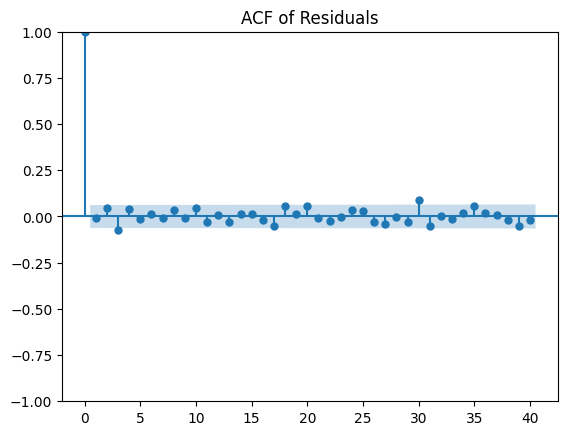

In [ ]:
residuals = model_fit.resid

plt.figure(figsize=(10, 6))
plot_acf(residuals, lags=40)
plt.title('ACF of Residuals')
plt.show()


The correlogram suggests that the residuals are approximately uncorrelated and behave like white noise. This is a good sign, indicating that the AR model you fitted has accounted for most of the serial correlation in the original time series. There is no significant structure left in the residuals, implying the model is a good fit